In [1]:
library(ggplot2)
library(plyr)
library(lme4)
library(lmtest)

Loading required package: Matrix
Loading required package: zoo

Attaching package: ‘zoo’

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric



In [2]:
# Read in table
a <- read.table('../../data/mapping-files/emp_qiime_mapping_qc_filtered.tsv', header=TRUE, sep = '\t', quote = '', comment.char = '')

# Add absolute latitude column
a$abs_lat <- abs(a$latitude_deg)

# Remove samples that don't have values for alpha diversity
a_nona <- subset(a, !is.na(adiv_observed_otus) & !is.na(adiv_shannon) & !is.na(adiv_faith_pd) & !is.na(abs_lat))

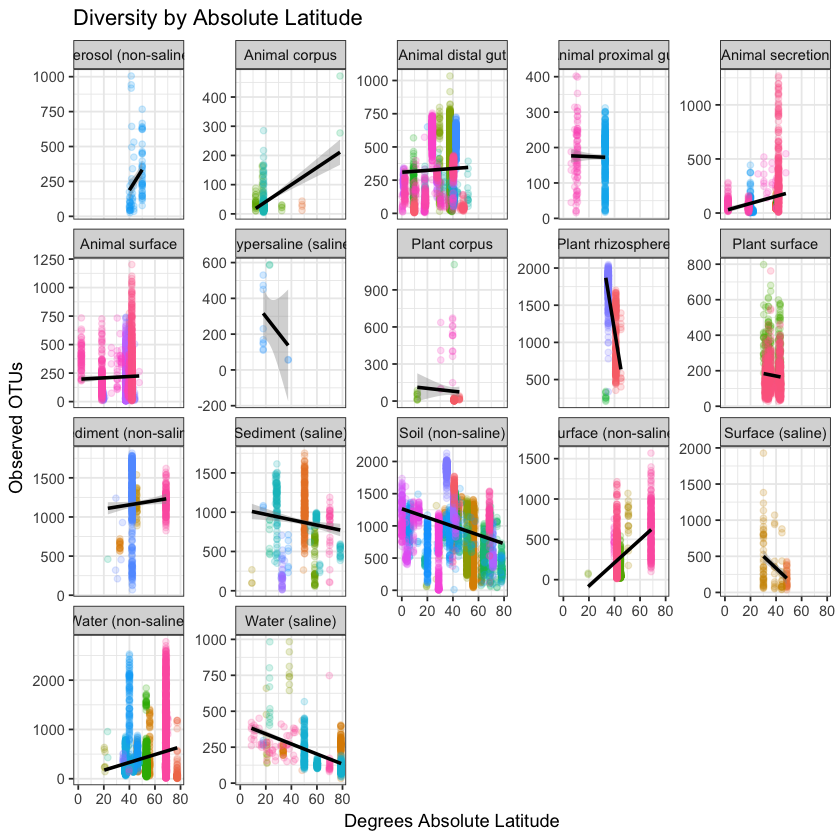

In [4]:
# Plot raw values

latitude_by_otus_raw <- ggplot(a_nona) +
    geom_point(aes(x = abs_lat, y = adiv_observed_otus, color=factor(study_id)), alpha=0.2) +
    theme_bw() +
    facet_wrap(~ empo_3, scales = 'free_y') +
    geom_smooth(method = 'lm', aes(x = abs_lat, y = adiv_observed_otus, group=factor(empo_3)), color='black') +
    theme(legend.position="none") + 
    ylab('Observed OTUs') + 
    xlab('Degrees Absolute Latitude') + 
    ggtitle('Diversity by Absolute Latitude')

latitude_by_otus_raw

In [ ]:
# ggsave(latitude_by_otus_raw, file='./Plots/latitude_by_otus_raw.pdf', width=10, height=8)

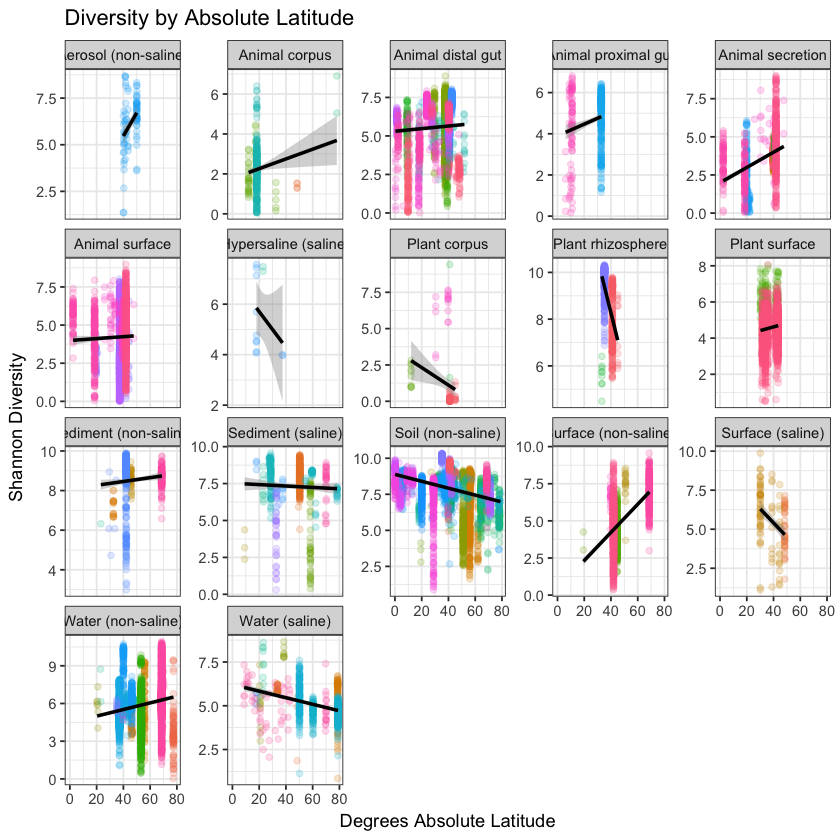

In [5]:
latitude_by_shannon_raw <- ggplot(a_nona) +
    geom_point(aes(x = abs_lat, y = adiv_shannon, color=factor(study_id)), alpha=0.2) +
    theme_bw() +
    facet_wrap(~ empo_3, scales = 'free_y') +
    geom_smooth(method = 'lm', aes(x = abs_lat, y = adiv_shannon, group=factor(empo_3)), color='black') +
    theme(legend.position="none") + 
    ylab('Shannon Diversity') + 
    xlab('Degrees Absolute Latitude') + 
    ggtitle('Diversity by Absolute Latitude')

latitude_by_shannon_raw

In [6]:
# ggsave(latitude_by_shannon_raw, file='./Plots/latitude_by_shannon_raw.pdf', width=10, height=8)

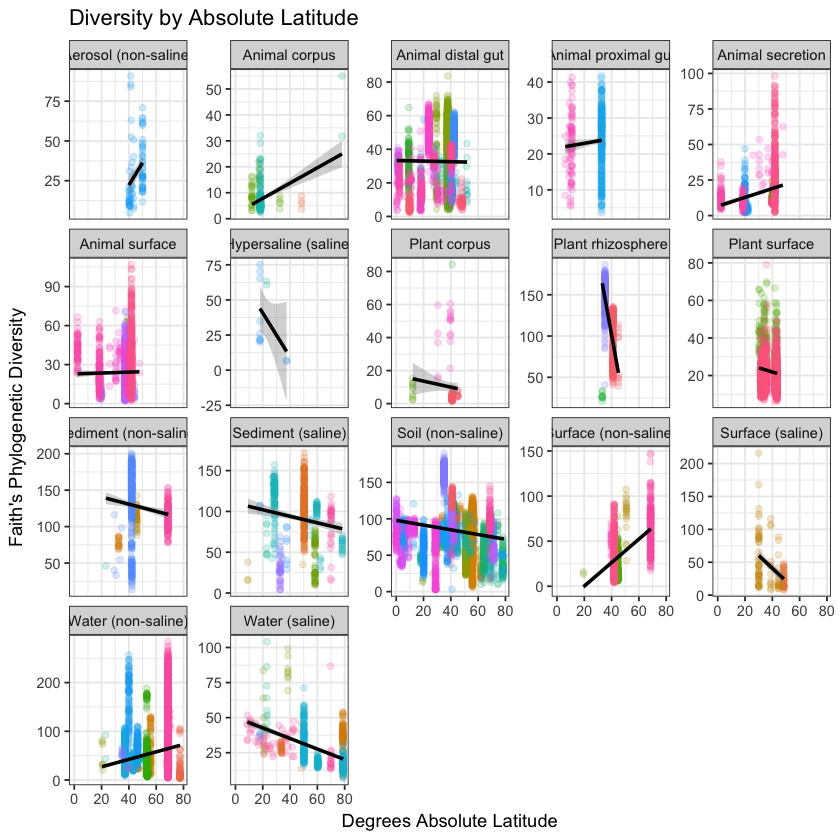

In [7]:
latitude_by_pd_raw <-  ggplot(a_nona) +
    geom_point(aes(x = abs_lat, y = adiv_faith_pd, color=factor(study_id)), alpha=0.2) +
    theme_bw() +
    facet_wrap(~ empo_3, scales = 'free_y') +
    geom_smooth(method = 'lm', aes(x = abs_lat, y = adiv_faith_pd, group=factor(empo_3)), color='black') +
    theme(legend.position="none") + 
    ylab('Faith\'s Phylogenetic Diversity') + 
    xlab('Degrees Absolute Latitude') + 
    ggtitle('Diversity by Absolute Latitude')

latitude_by_pd_raw

In [8]:
# ggsave(latitude_by_pd_raw, file='./Plots/latitude_by_pd_raw.pdf', width=10, height=8)

Warning message in qt((1 - level)/2, df):
“NaNs produced”Warning message in qt((1 - level)/2, df):
“NaNs produced”Warning message in qt((1 - level)/2, df):
“NaNs produced”Warning message in qt((1 - level)/2, df):
“NaNs produced”

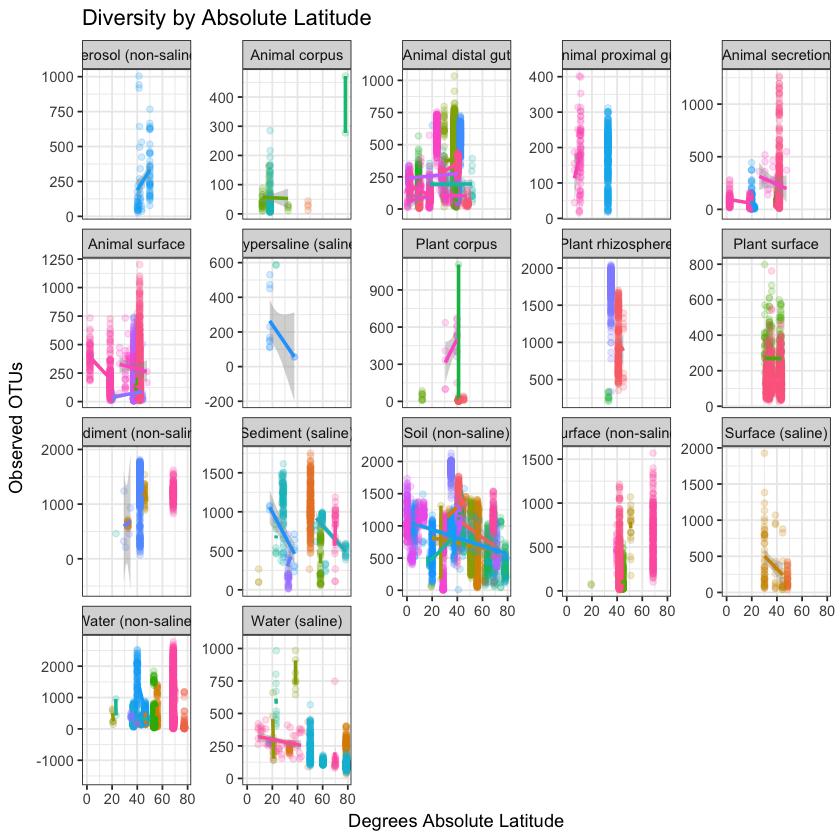

In [9]:
# plot by study

latitude_by_otus_per_study <- ggplot(a_nona, aes(x = abs_lat, y = adiv_observed_otus, color=factor(study_id))) +
    geom_point(alpha=0.2) +
    theme_bw() +
    facet_wrap(~ empo_3, scales = 'free_y') +
    geom_smooth(method = 'lm') +
    theme(legend.position="none") + 
    ylab('Observed OTUs') + 
    xlab('Degrees Absolute Latitude') + 
    ggtitle('Diversity by Absolute Latitude')

latitude_by_otus_per_study

In [10]:
# ggsave(latitude_by_otus_per_study, file='./Plots/latitude_by_otus_per_study.pdf', width=10, height=8)

In [11]:
latitude_by_shannon_per_study <- ggplot(a_nona, aes(x = abs_lat, y = adiv_shannon, color=factor(study_id))) +
    geom_point(alpha=0.2) +
    theme_bw() +
    facet_wrap(~ empo_3, scales = 'free_y') +
    geom_smooth(method = 'lm') +
    theme(legend.position="none") + 
    ylab('Shannon Diversity') + 
    xlab('Degrees Absolute Latitude') + 
    ggtitle('Diversity by Absolute Latitude')

In [12]:
# ggsave(latitude_by_shannon_per_study, file='./Plots/latitude_by_shannon_per_study.pdf', width=10, height=8)

Warning message in qt((1 - level)/2, df):
“NaNs produced”Warning message in qt((1 - level)/2, df):
“NaNs produced”Warning message in qt((1 - level)/2, df):
“NaNs produced”Warning message in qt((1 - level)/2, df):
“NaNs produced”

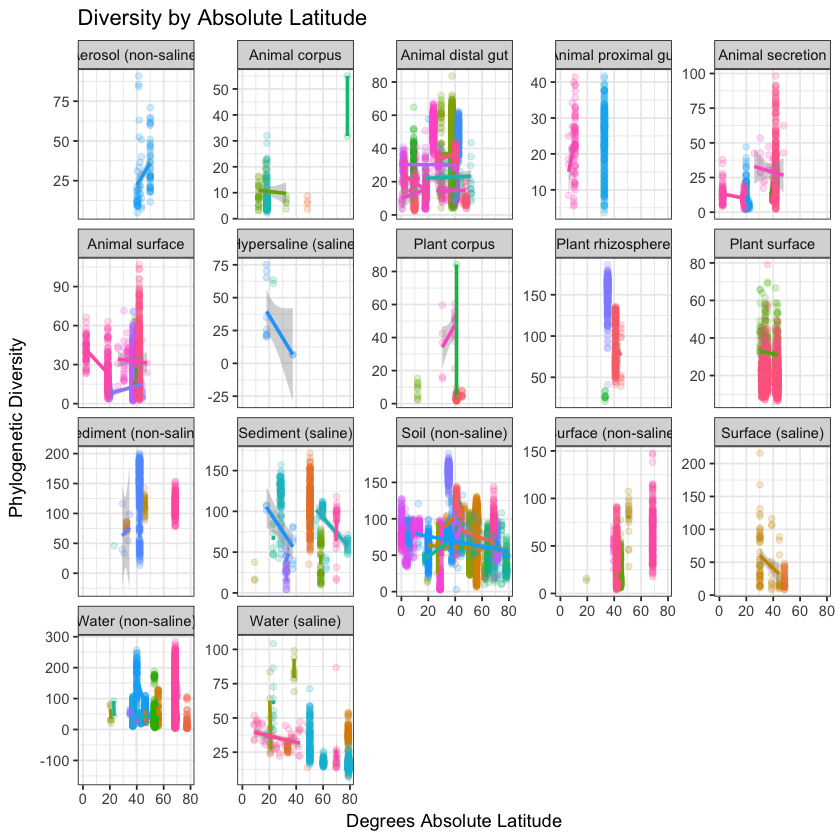

In [13]:
latitude_by_pd_per_study <- ggplot(a_nona, aes(x = abs_lat, y = adiv_faith_pd, color=factor(study_id))) +
    geom_point(alpha=0.2) +
    theme_bw() +
    facet_wrap(~ empo_3, scales = 'free_y') +
    geom_smooth(method = 'lm') +
    theme(legend.position="none") + 
    ylab('Phylogenetic Diversity') + 
    xlab('Degrees Absolute Latitude') + 
    ggtitle('Diversity by Absolute Latitude')

latitude_by_pd_per_study

In [14]:
# ggsave(latitude_by_pd_per_study, file='./Plots/latitude_by_pd_per_study.pdf', width=10, height=8)

In [15]:
### 'Conservative' analysis: reducing pseudoreplication

# Filter values down by degree latitude study to reduce pseudoreplication

a_nona_round <- a_nona
a_nona_round$abs_lat_1. <- round(a_nona$abs_lat, digits = 0)
a_nona_round$abs_lat_0.1 <- round(a_nona$abs_lat, digits = 1)

a_nona_round_summary_1. <- ddply(a_nona_round, c("abs_lat_1.", "study_id", "empo_3"),
                                 summarise,
                                 adiv_observed_otus = mean(adiv_observed_otus),
                                 adiv_faith_pd = mean(adiv_faith_pd),
                                 adiv_shannon = mean(adiv_shannon)
                                 )

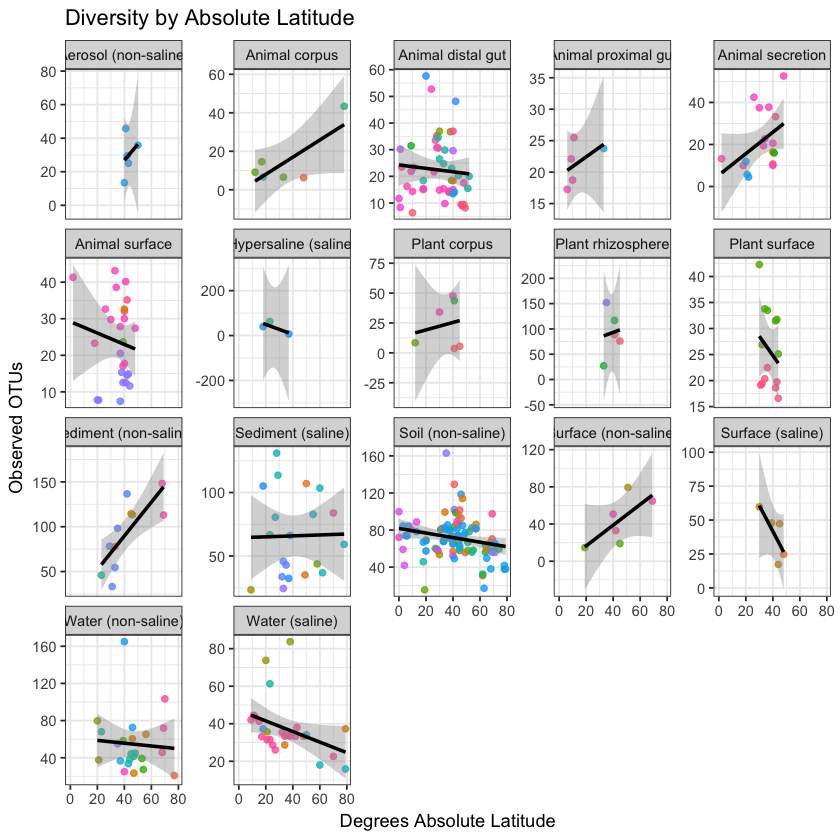

In [16]:
# Plot dereplicated values

latitude_by_otus_reduced <- ggplot(a_nona_round_summary_1.) +
    geom_point(aes(x = abs_lat_1., y = adiv_faith_pd, color=factor(study_id)), alpha=0.8) +
    theme_bw() +
    facet_wrap(~ empo_3, scales = 'free_y') +
    geom_smooth(method = 'lm', aes(x = abs_lat_1., y = adiv_faith_pd, group=factor(empo_3)), color='black') +
    theme(legend.position="none") + 
    ylab('Observed OTUs') + 
    xlab('Degrees Absolute Latitude') + 
    ggtitle('Diversity by Absolute Latitude')

latitude_by_otus_reduced

In [17]:
# ggsave(latitude_by_otus_reduced, file='./Plots/latitude_by_otus_reduced.pdf', width=10, height=8)

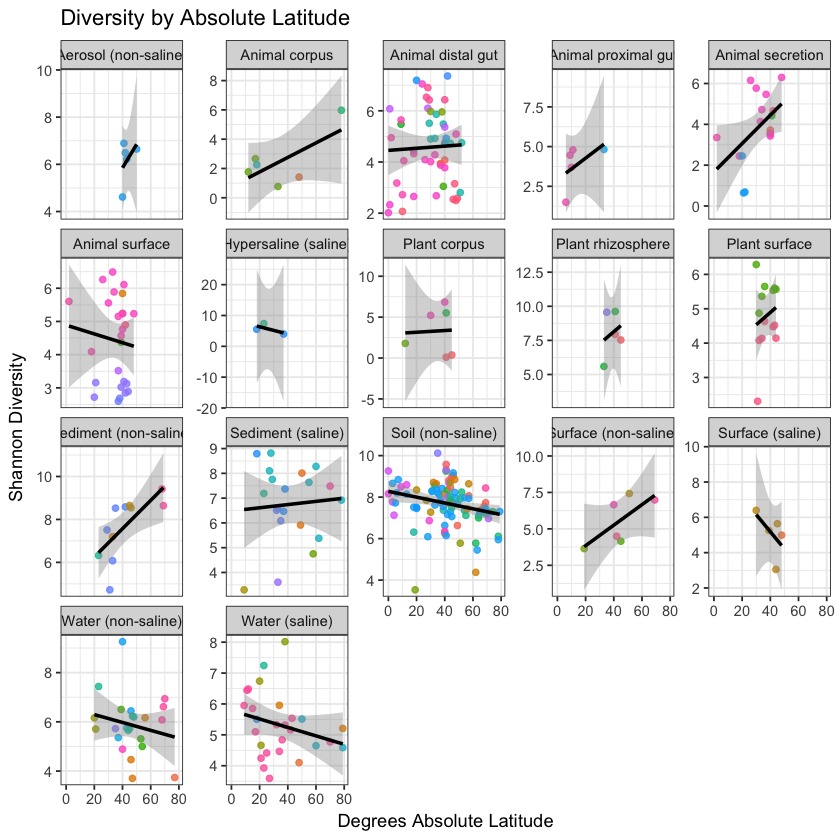

In [18]:
latitude_by_shannon_reduced <- ggplot(a_nona_round_summary_1.) +
    geom_point(aes(x = abs_lat_1., y = adiv_shannon, color=factor(study_id)), alpha=0.8) +
    theme_bw() +
    facet_wrap(~ empo_3, scales = 'free_y') +
    geom_smooth(method = 'lm', aes(x = abs_lat_1., y = adiv_shannon, group=factor(empo_3)), color='black') +
    theme(legend.position="none") + 
    ylab('Shannon Diversity') + 
    xlab('Degrees Absolute Latitude') + 
    ggtitle('Diversity by Absolute Latitude')

latitude_by_shannon_reduced

In [19]:
# ggsave(latitude_by_shannon_reduced, file='./Plots/latitude_by_shannon_reduced.pdf', width=10, height=8)

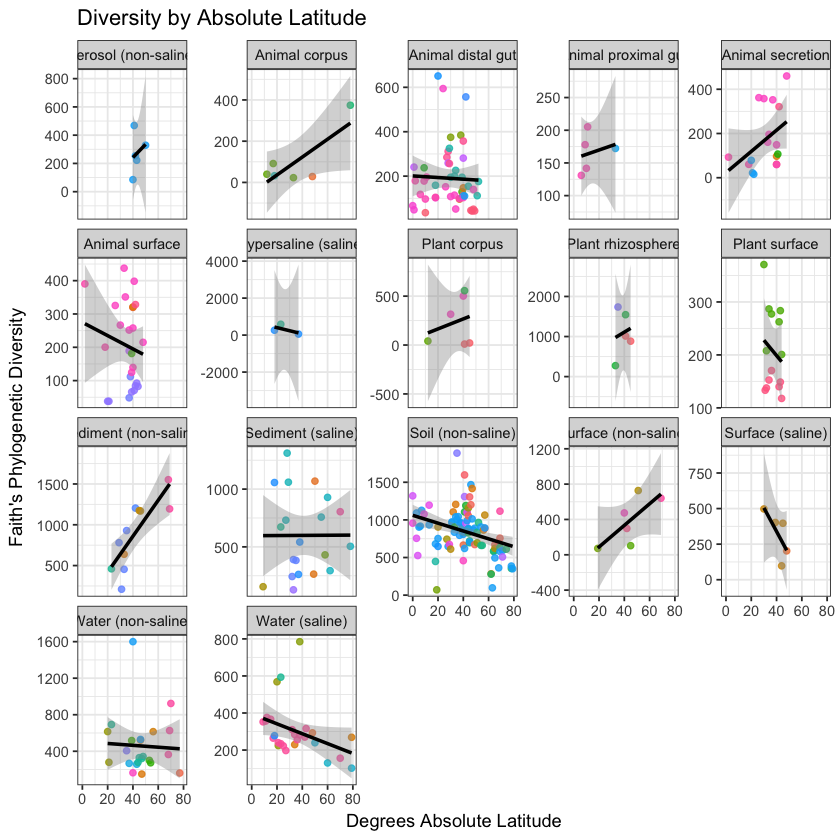

In [20]:
latitude_by_pd_reduced <- ggplot(a_nona_round_summary_1.) +
    geom_point(aes(x = abs_lat_1., y = adiv_observed_otus, color=factor(study_id)), alpha=0.8) +
    theme_bw() +
    facet_wrap(~ empo_3, scales = 'free_y') +
    geom_smooth(method = 'lm', aes(x = abs_lat_1., y = adiv_observed_otus, group=factor(empo_3)), color='black') +
    theme(legend.position="none") + 
    ylab('Faith\'s Phylogenetic Diversity') + 
    xlab('Degrees Absolute Latitude') + 
    ggtitle('Diversity by Absolute Latitude')

latitude_by_pd_reduced

In [21]:
# ggsave(latitude_by_pd_reduced, file='./Plots/latitude_by_pd_reduced.pdf', width=10, height=8)

In [22]:
### Linear models on dereplicated data

# Make data frame for each empo value, including number of studies 
study_num <- ddply(a_nona_round, .(empo_3),
                   summarise,
                   studies = length(unique(study_id)),
                   p_otu = NA,
                   t_otu = NA,
                   estimate_otu = NA,
                   p_pd = NA,
                   t_pd = NA,
                   estimate_pd = NA,
                   p_shannon = NA,
                   t_shannon = NA,
                   estimate_shannon = NA
                   )

row.names(study_num) <- study_num$empo_3

for(empo in study_num[study_num$studies >= 10,'empo_3']) {
    print(empo)
    otu <- lm(adiv_observed_otus ~ abs_lat_1., 
        data = subset(a_nona_round_summary_1., empo_3 == empo))
    pd <- lm(adiv_shannon ~ abs_lat_1., 
        data = subset(a_nona_round_summary_1., empo_3 == empo))
    shannon <- lm(adiv_faith_pd ~ abs_lat_1., 
        data = subset(a_nona_round_summary_1., empo_3 == empo))

    study_num[empo,'p_otu'] <- summary(otu)$coefficients[2,4]
    study_num[empo,'t_otu'] <- summary(otu)$coefficients[2,3]
    study_num[empo,'estimate_otu'] <- summary(otu)$coefficients[2,1]
    study_num[empo,'p_pd'] <- summary(pd)$coefficients[2,4]
    study_num[empo,'t_pd'] <- summary(pd)$coefficients[2,3]
    study_num[empo,'estimate_pd'] <- summary(pd)$coefficients[2,1]
    study_num[empo,'p_shannon'] <- summary(shannon)$coefficients[2,4]
    study_num[empo,'t_shannon'] <- summary(shannon)$coefficients[2,3]
    study_num[empo,'estimate_shannon'] <- summary(shannon)$coefficients[2,1]
}

[1] "Animal distal gut"
[1] "Animal surface"
[1] "Sediment (saline)"
[1] "Soil (non-saline)"
[1] "Water (non-saline)"
[1] "Water (saline)"


In [23]:
na.omit(study_num)

# > na.omit(study_num)
#                                empo_3 studies        p_otu       t_otu estimate_otu
# Animal distal gut   Animal distal gut      18 0.7928705505 -0.26408294  -0.36447043
# Animal surface         Animal surface      10 0.4317998933 -0.79957536  -1.99321494
# Sediment (saline)   Sediment (saline)      11 0.9891735259  0.01375911   0.06258892
# Soil (non-saline)   Soil (non-saline)      42 0.0009456305 -3.41422321  -5.21063032
# Water (non-saline) Water (non-saline)      14 0.8263819970 -0.22209970  -1.02095744
# Water (saline)         Water (saline)      12 0.0621708361 -1.95243415  -2.66628737
#                          p_pd       t_pd  estimate_pd  p_shannon   t_shannon
# Animal distal gut  0.77788684  0.2836993  0.004141496 0.58025445 -0.55687594
# Animal surface     0.61546108 -0.5089117 -0.013229664 0.49253934 -0.69693532
# Sediment (saline)  0.75190976  0.3209969  0.006455412 0.93243415  0.08597662
# Soil (non-saline)  0.01077273 -2.6018375 -0.014039918 0.03300365 -2.16393914
# Water (non-saline) 0.35055600 -0.9547707 -0.016034405 0.74665873 -0.32733022
# Water (saline)     0.19062047 -1.3452515 -0.013667860 0.05328018 -2.02857944
#                    estimate_shannon
# Animal distal gut       -0.06426437
# Animal surface          -0.15582095
# Sediment (saline)        0.03696384
# Soil (non-saline)       -0.24569282
# Water (non-saline)      -0.15005910
# Water (saline)          -0.28209613

empo_3             studies p_otu        t_otu      
Animal distal gut  Animal distal gut  18      0.7928705505 -0.26408294
Animal surface     Animal surface     10      0.4317998933 -0.79957536
Sediment (saline)  Sediment (saline)  11      0.9891735259  0.01375911
Soil (non-saline)  Soil (non-saline)  42      0.0009456305 -3.41422321
Water (non-saline) Water (non-saline) 14      0.8263819970 -0.22209970
Water (saline)     Water (saline)     12      0.0621708361 -1.95243415
                   estimate_otu p_pd       t_pd       estimate_pd  p_shannon 
Animal distal gut  -0.36447043  0.77788684  0.2836993  0.004141496 0.58025445
Animal surface     -1.99321494  0.61546108 -0.5089117 -0.013229664 0.49253934
Sediment (saline)   0.06258892  0.75190976  0.3209969  0.006455412 0.93243415
Soil (non-saline)  -5.21063032  0.01077273 -2.6018375 -0.014039918 0.03300365
Water (non-saline) -1.02095744  0.35055600 -0.9547707 -0.016034405 0.74665873
Water (saline)     -2.66628737  0.19062047 -1.3452515 -0.013667860 0.05328018
                   t_shannon   estimate_shannon
Animal distal gut  -0.55687594 -0.06426437     
Animal surface     -0.69693532 -0.15582095     
Sediment (saline)   0.08597662  0.03696384     
Soil (non-saline)  -2.16393914 -0.24569282     
Water (non-saline) -0.32733022 -0.15005910     
Water (saline)     -2.02857944 -0.28209613

In [24]:
### Analysis restricted to studies spanning latitudinal gradients

# Find studies with samples observed over a range of > 10 deg latitude

study_range <- ddply(a_nona, .(study_id),
                   summarise,
                   range_abs_lat = max(abs_lat) - min(abs_lat)
                   )

a_nona_range <- subset(a_nona, study_id %in% study_range[study_range$range_abs_lat >= 10, 'study_id'])

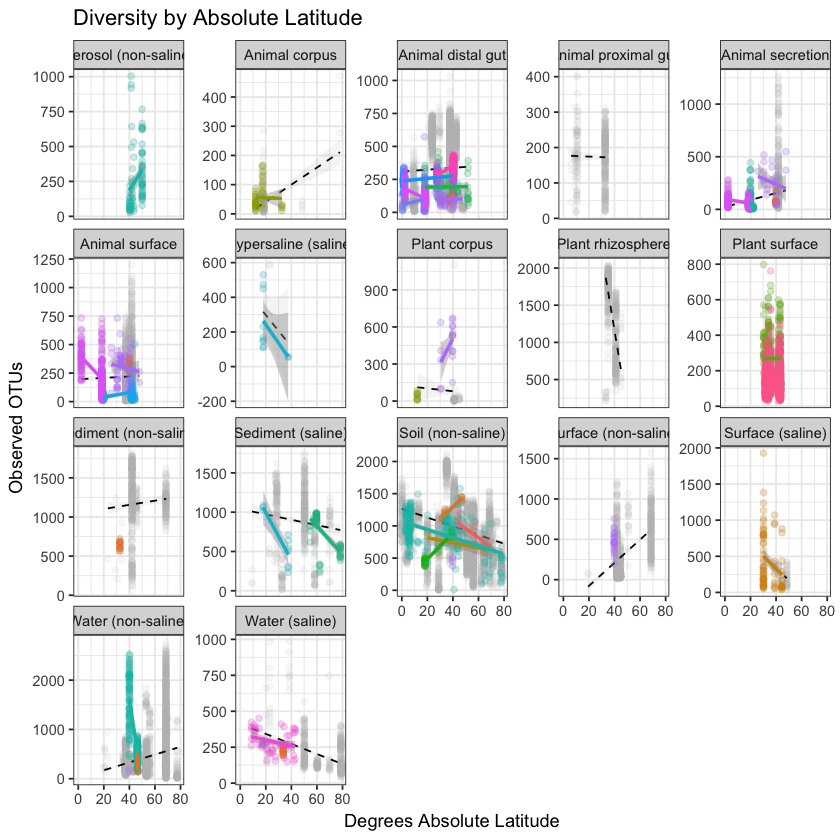

In [25]:
# Plot samples from these studies as colored, with all samples as grey backdrop.
# Plot lm fits per each of these studies in same color, with total fit in bg

latitude_by_otus_reduced_perstudy <- ggplot() +
    geom_point(data = a_nona, aes(x = abs_lat, y = adiv_observed_otus), color = 'grey', alpha=0.1) +
    geom_smooth(method = 'lm', data = a_nona, aes(x = abs_lat, y = adiv_observed_otus), color='black', alpha=0.1, size = 0.5, lty = 'dashed') +
    geom_point(data = a_nona_range, aes(x = abs_lat, y = adiv_observed_otus, color=factor(study_id)), alpha=0.2) +
    theme_bw() +
    facet_wrap(~ empo_3, scales = 'free_y') +
    geom_smooth(method = 'lm', data = a_nona_range, aes(x = abs_lat, y = adiv_observed_otus, color=factor(study_id))) +
    theme(legend.position="none") + 
    ylab('Observed OTUs') + 
    xlab('Degrees Absolute Latitude') + 
    ggtitle('Diversity by Absolute Latitude')

latitude_by_otus_reduced_perstudy

In [26]:
# ggsave(latitude_by_otus_reduced_perstudy, file='./Plots/latitude_by_otus_reduced_perstudy.pdf', width=10, height=8)

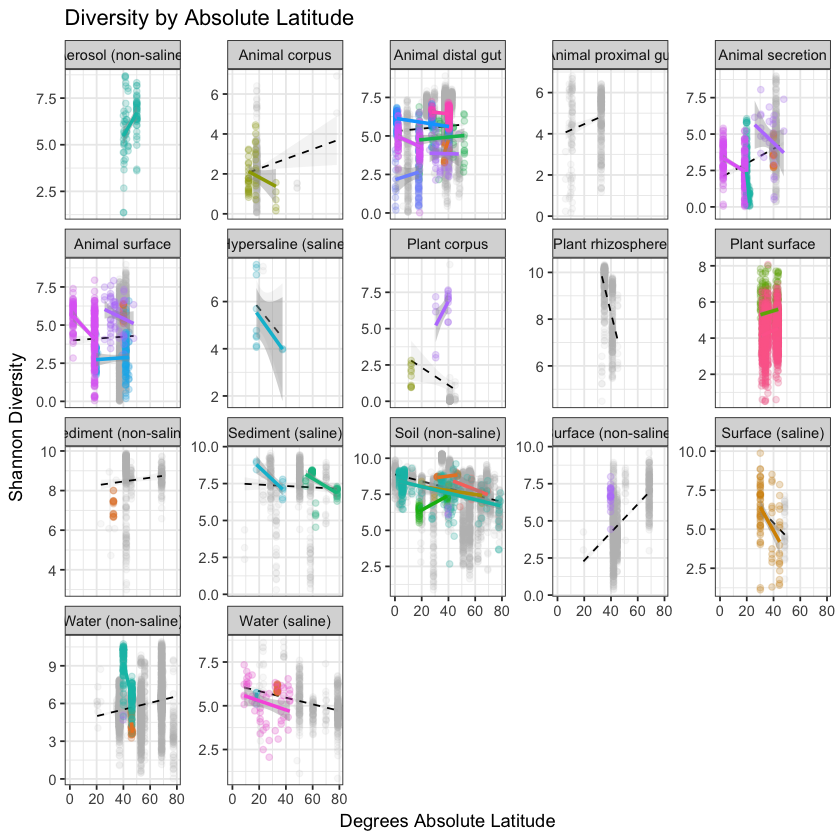

In [27]:
latitude_by_shannon_reduced_perstudy <- ggplot() +
    geom_point(data = a_nona, aes(x = abs_lat, y = adiv_shannon), color = 'grey', alpha=0.1) +
    geom_smooth(method = 'lm', data = a_nona, aes(x = abs_lat, y = adiv_shannon), color='black', alpha=0.1, size = 0.5, lty = 'dashed') +
    geom_point(data = a_nona_range, aes(x = abs_lat, y = adiv_shannon, color=factor(study_id)), alpha=0.2) +
    theme_bw() +
    facet_wrap(~ empo_3, scales = 'free_y') +
    geom_smooth(method = 'lm', data = a_nona_range, aes(x = abs_lat, y = adiv_shannon, color=factor(study_id))) +
    theme(legend.position="none") + 
    ylab('Shannon Diversity') + 
    xlab('Degrees Absolute Latitude') + 
    ggtitle('Diversity by Absolute Latitude')

latitude_by_shannon_reduced_perstudy

In [28]:
# ggsave(latitude_by_shannon_reduced_perstudy, file='./Plots/latitude_by_shannon_reduced_perstudy.pdf', width=10, height=8)

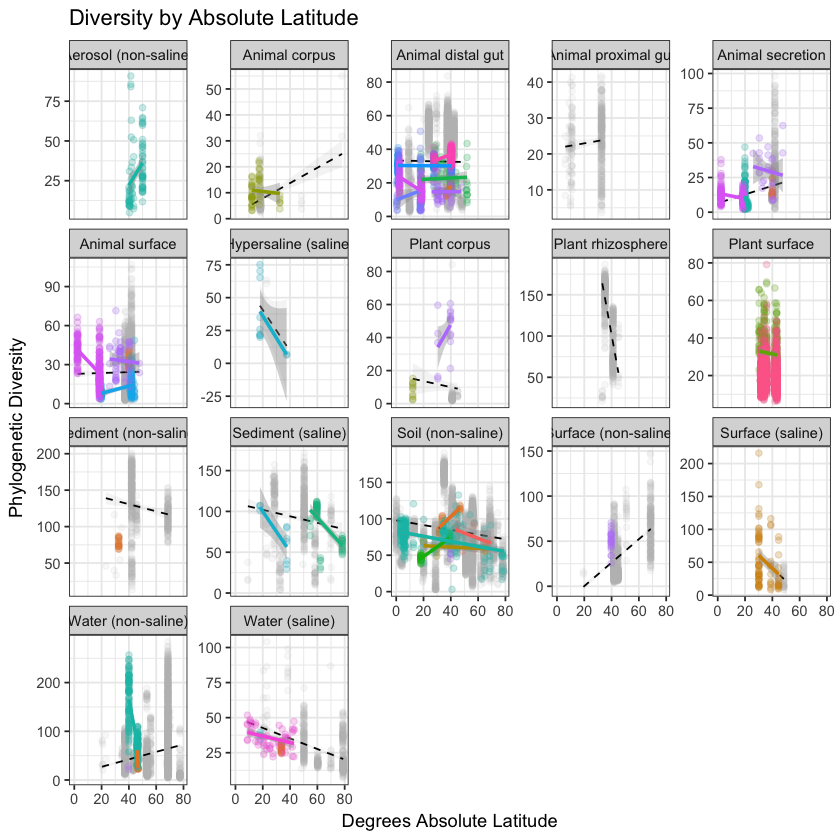

In [29]:
latitude_by_pd_reduced_perstudy <- ggplot() +
    geom_point(data = a_nona, aes(x = abs_lat, y = adiv_faith_pd), color = 'grey', alpha=0.1) +
    geom_smooth(method = 'lm', data = a_nona, aes(x = abs_lat, y = adiv_faith_pd), color='black', alpha=0.1, size = 0.5, lty = 'dashed') +
    geom_point(data = a_nona_range, aes(x = abs_lat, y = adiv_faith_pd, color=factor(study_id)), alpha=0.2) +
    theme_bw() +
    facet_wrap(~ empo_3, scales = 'free_y') +
    geom_smooth(method = 'lm', data = a_nona_range, aes(x = abs_lat, y = adiv_faith_pd, color=factor(study_id))) +
    theme(legend.position="none") + 
    ylab('Phylogenetic Diversity') + 
    xlab('Degrees Absolute Latitude') + 
    ggtitle('Diversity by Absolute Latitude')

latitude_by_pd_reduced_perstudy

In [30]:
# ggsave(latitude_by_pd_reduced_perstudy, file='./Plots/latitude_by_pd_reduced_perstudy.pdf', width=10, height=8)

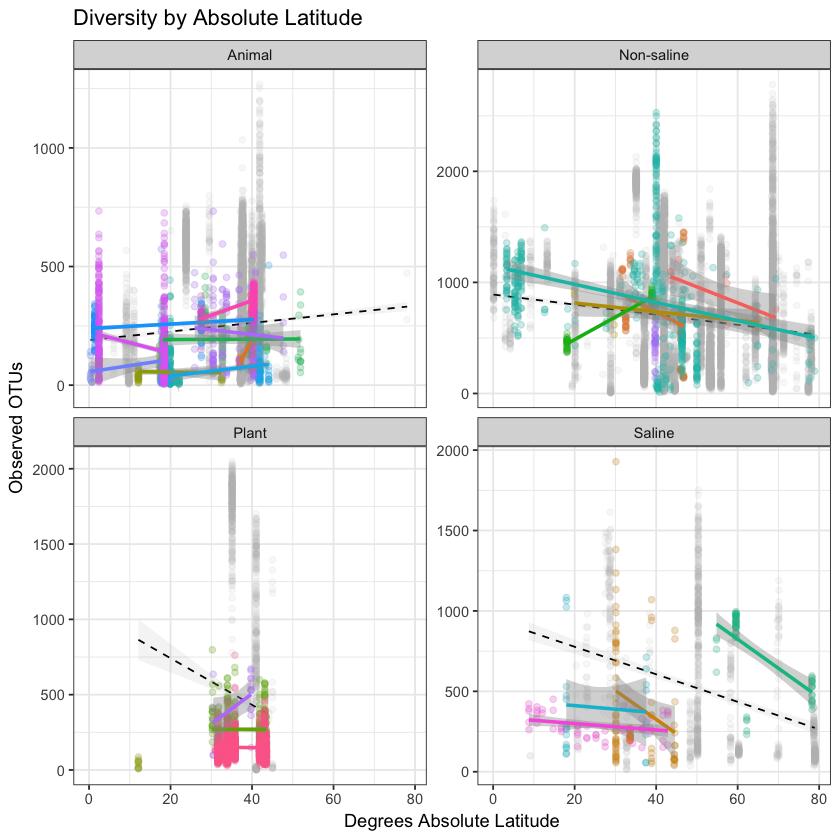

In [31]:
### Looking at Empo_2 category with melm

# Plot these same samples, but faceted by Empo_2 category

latitude_by_otus_reduced_perstudy_empo2 <- ggplot() +
    geom_point(data = a_nona, aes(x = abs_lat, y = adiv_observed_otus), color = 'grey', alpha=0.1) +
    geom_smooth(method = 'lm', data = a_nona, aes(x = abs_lat, y = adiv_observed_otus), color='black', alpha=0.1, size = 0.5, lty = 'dashed') +
    geom_point(data = a_nona_range, aes(x = abs_lat, y = adiv_observed_otus, color=factor(study_id)), alpha=0.2) +
    theme_bw() +
    facet_wrap(~ empo_2, scales = 'free_y') +
    geom_smooth(method = 'lm', data = a_nona_range, aes(x = abs_lat, y = adiv_observed_otus, color=factor(study_id))) +
    theme(legend.position="none") + 
    ylab('Observed OTUs') + 
    xlab('Degrees Absolute Latitude') + 
    ggtitle('Diversity by Absolute Latitude')

latitude_by_otus_reduced_perstudy_empo2

In [32]:
# ggsave(latitude_by_otus_reduced_perstudy_empo2, file='./Plots/latitude_by_otus_reduced_perstudy_empo2.pdf', width=6, height=5)

In [33]:
# Linear mixed-effects model on these data, using Empo_2 as a fixed effect that
# interacts with absolute latitude + study_id as a random effect


# Compact Model
baseline <- lmer(adiv_observed_otus  ~ (1 | study_id),
data = a_nona_range,
REML = TRUE)
# full Model
empomodel <- lmer(adiv_observed_otus ~ empo_2 + (1 | study_id),
data = a_nona_range,
REML = TRUE)
# full Model
fullmodel <- lmer(adiv_observed_otus ~ abs_lat * empo_2 + (1 | study_id),
data = a_nona_range,
REML = TRUE)

anova(baseline, empomodel, fullmodel)

refitting model(s) with ML (instead of REML)


Df AIC      BIC      logLik    deviance Chisq    Chi Df Pr(>Chisq)   
baseline   3 57816.23 57835.20 -28905.12 57810.23       NA NA                NA
empomodel  6 56548.58 56586.52 -28268.29 56536.58 1273.651  3     7.672458e-276
fullmodel 10 56307.78 56371.02 -28143.89 56287.78  248.798  4      1.181647e-52

In [34]:
# > anova(baseline, empomodel, fullmodel)
# refitting model(s) with ML (instead of REML)
# Data: a_nona_range
# Models:
# object: adiv_observed_otus ~ (1 | study_id)
# ..1: adiv_observed_otus ~ empo_2 + (1 | study_id)
# ..2: adiv_observed_otus ~ abs_lat * empo_2 + (1 | study_id)
#        Df   AIC   BIC logLik deviance  Chisq Chi Df Pr(>Chisq)    
# object  3 57816 57835 -28905    57810                             
# ..1     6 56549 56587 -28268    56537 1273.7      3  < 2.2e-16 ***
# ..2    10 56308 56371 -28144    56288  248.8      4  < 2.2e-16 ***
# ---
# Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [35]:
summary(fullmodel)

Linear mixed model fit by REML ['lmerMod']
Formula: adiv_observed_otus ~ abs_lat * empo_2 + (1 | study_id)
   Data: a_nona_range

REML criterion at convergence: 56245.8

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.5206 -0.3659 -0.0906  0.2315  7.8109 

Random effects:
 Groups   Name        Variance Std.Dev.
 study_id (Intercept) 35635    188.8   
 Residual             49160    221.7   
Number of obs: 4121, groups:  study_id, 19

Fixed effects:
                         Estimate Std. Error t value
(Intercept)              155.2750    48.8019    3.18
abs_lat                    0.9417     0.6211    1.52
empo_2Non-saline         971.8017    29.6043   32.83
empo_2Plant              171.9668    56.7819    3.03
empo_2Saline             422.1123    76.2385    5.54
abs_lat:empo_2Non-saline  -8.6613     0.7896  -10.97
abs_lat:empo_2Plant       -0.1133     1.2645   -0.09
abs_lat:empo_2Saline      -8.3054     1.7550   -4.73

Correlation of Fixed Effects:
            (Intr) abs_lt

In [36]:
# > summary(fullmodel)
# Linear mixed model fit by REML t-tests use Satterthwaite approximations to degrees of
#   freedom [lmerMod]
# Formula: adiv_observed_otus ~ abs_lat * empo_2 + (1 | study_id)
#    Data: a_nona_range

# REML criterion at convergence: 56245.8

# Scaled residuals: 
#     Min      1Q  Median      3Q     Max 
# -3.5206 -0.3659 -0.0906  0.2315  7.8109 

# Random effects:
#  Groups   Name        Variance Std.Dev.
#  study_id (Intercept) 35635    188.8   
#  Residual             49160    221.7   
# Number of obs: 4121, groups:  study_id, 19

# Fixed effects:
#                           Estimate Std. Error        df t value Pr(>|t|)    
# (Intercept)               155.2750    48.8019   22.0000   3.182  0.00438 ** 
# abs_lat                     0.9417     0.6211 4074.0000   1.516  0.12956    
# empo_2Non-saline          971.8017    29.6043 4084.0000  32.826  < 2e-16 ***
# empo_2Plant               171.9668    56.7819 3056.0000   3.029  0.00248 ** 
# empo_2Saline              422.1123    76.2385 1147.0000   5.537 3.82e-08 ***
# abs_lat:empo_2Non-saline   -8.6613     0.7896 4107.0000 -10.969  < 2e-16 ***
# abs_lat:empo_2Plant        -0.1133     1.2645 4112.0000  -0.090  0.92860    
# abs_lat:empo_2Saline       -8.3054     1.7550 1784.0000  -4.732 2.39e-06 ***
# ---
# Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

# Correlation of Fixed Effects:
#             (Intr) abs_lt em_2N- emp_2P emp_2S a_:_2N a_:_2P
# abs_lat     -0.349                                          
# emp_2Nn-sln -0.246  0.537                                   
# empo_2Plant -0.180  0.283  0.171                            
# empo_2Salin -0.214  0.260  0.190  0.087                     
# abs_lt:_2N-  0.263 -0.773 -0.813 -0.217 -0.194              
# abs_lt:m_2P  0.144 -0.463 -0.244 -0.642 -0.117  0.358       
# abs_lt:m_2S  0.102 -0.356 -0.192 -0.099 -0.783  0.275  0.165
# >